# Some Multiplicative Functionals

**Daisuke Oyama, Thomas J. Sargent and John Stachurski**

In [1]:
%matplotlib inline

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov import tauchen, MarkovChain
from mult_functional import MultFunctionalFiniteMarkov
from asset_pricing_mult_functional import (
    AssetPricingMultFiniteMarkov, LucasTreeFiniteMarkov
)

## Plan of the notebook

In other quant-econ lectures
("[Markov Asset Pricing](http://quant-econ.net/py/markov_asset.html)" and
"[The Lucas Asset Pricing Model](http://quant-econ.net/py/lucas_model.html)"),
we have studied the celebrated **Lucas asset pricing model** (Lucas (1978)) that is cast in a setting in which the key objects of the theory,
namely, a *stochastic discount factor process*, an *aggregate consumption process*, and an
*asset payout process*, are all taken to be stationary.

In this notebook, we shall learn about some tools that allow us to extend asset pricing models to settings in which neither the *stochastic discount factor process* nor the asset's *payout process* is a stationary process.  The key tool is the class of **multiplicative functionals** from the stochastic process literature that Hansen and Scheinkman (2009) have adapted so that they can be applied to asset pricing and other interesting macroeconomic problems.  

In this notebook, we confine ourselves to studying a special type of multiplicative functional, namely, **multiplicative functionals driven by finite state Markov chains**.  We'll learn about some  of their properties and applications.  Among other things, we'll
obtain Hansen and Scheinkman's more general multiplicative decomposition of our particular type of multiplicative functional into the following three primitive types of multiplicative functions:

 * a nonstochastic process displaying deterministic exponential growth;

 * a **multiplicative martingale** or **likelihood ratio process**; and
 
 * a stationary stochastic process that is the exponential of another stationary process. 
 
The first two of these primitive types are nonstationary while the third is stationary.  The first is nonstochastic, while the second and third are stochastic.

After taking a look at the behavior of these three primitive components, we'll apply this structure to model

 * a stochastically, exponentially declining **stochastic discount factor process**;
 
 * a stochastically,  exponentially growing or declining **asset payout** or **dividend** process;
 
 * the **prices** of claims to exponentially growing or declining payout processes; and
 
 * a theory of the **term structure of interest rates**.

We begin by describing a basic setting that we'll use in several applications later in this notebook.


### Multiplicative functional driven by a finite state Markov chain

Let $S$ be the integers $\{0, \ldots, n-1\}$.  Because we study stochastic
processes taking values in $S$, elements of $S$ will be denoted by symbols
such as $x, y$ instead of $i, j$.  Also, to avoid double subscripts, for a
vector $h \in {\mathbb R}^n$ we will write $h(x)$ instead of $h_x$ for the value at
index $x$.
(In fact $h$ can also be understood as a function $h \colon S \to {\mathbb R}$. However, in expressions involving matrix algebra we always regard it as a column vector.  Similarly, $S$ can be any finite set but in what follows we identify it with $\{0, \ldots, n-1\}$.)  

Matrices are represented by symbols such as ${\mathbf P}$ and ${\mathbf Q}$. Analogous to 
the vector case, the $(x,y)$-th element of matrix ${\mathbf Q}$ is written
${\mathbf Q}(x, y)$
rather than ${\mathbf Q}_{x y}$.  A nonnegative $n \times n$ matrix ${\mathbf
Q}$ is
called **irreducible** if, for any $(x, y) \in S \times S$, there exists an
integer $m$ such that ${\mathbf Q}^m(x, y) > 0$.  It is called **ergodic** if there
exists an integer $m$ such that ${\mathbf Q}^m(x, y) > 0$ for all $(x, y) \in S \times
S$.

Let ${\mathbf P}$ be a stochastic $n \times n$ matrix and let $\{X_t\}$ be
a Markov process with transition probabilities ${\mathbf P}$.  That is, $\{X_t\}$ is a Markov process on $S$ satisfying
 
$$
    \mathbb P [ X_{t+1}  = y \mid {\mathcal F}_t] 
    = {\mathbf P}(X_t, y)
$$
 
for all $y \in S$.  Here $\{{\mathcal F}_t\}$ is the natural filtration generated by
$\{X_t\}$ and the equality holds almost surely on an underlying probability
space $(\Omega, {\mathcal F}, \mathbb P)$.  


A **martingale** with respect to $\{{\mathcal F}_t\}$ is a real-valued stochastic
process on $(\Omega, {\mathcal F}, \mathbb P)$ satisfying $E[|M_t|] < \infty$ and $E[M_{t+1} \mid
{\mathcal F}_t] = M_t$ for all $t$.
A **multiplicative functional** generated by $\{X_t\}$ is a real-valued stochastic
process $\{M_t\}$ satisfying $M_0 > 0$ and
 
$$
    \frac{M_{t+1}}{M_t} = {\mathbf M}(X_t, X_{t+1})
$$
 
for some strictly positive $n \times n$ matrix ${\mathbf M}$.
If, in addition, 
 
$$
    E[ {\mathbf M}(X_t, X_{t+1}) \mid {\mathcal F}_t] = 1,
$$
 
then $\{M_t\}$ is clearly a martingale.  Given its construction as a product of factors ${\mathbf M}(X_t, X_{t+1})$, it is sometimes called a
**multiplicative martingale**.

If we write
 
$$
    \ln M_{t+1} - \ln M_t = {\mathbf G}(X_t, X_{t+1})
$$

where

$$
    {\mathbf G}(X_t, X_{t+1}) := \ln {\mathbf M}(X_t, X_{t+1}),
$$
 
then ${\mathbf G}(x, y)$ can be interpreted as the growth rate of $\{M_t\}$ at state pair $(x, y)$.

A **likelihood ratio process** is a multiplicative martingale $\{M_t\}$ with initial condition $M_0 = 1$.  From this initial condition and the martingale property it is easy to show that
 
$$
    E[M_t] = E[M_t \mid {\mathcal F}_0] = 1
$$
 
for all $t$.



### Martingale decomposition

Let ${\mathbf P}$ be a stochastic matrix, let ${\mathbf M}$ be a positive $n
\times n$ matrix and let $\{M_t\}$ be the multiplicative functional defined
above.  Assume that ${\mathbf P}$ is irreducible. Let $\widetilde {\mathbf P}$ be defined by
 
$$
    \widetilde {\mathbf P} (x, y) = {\mathbf M}(x, y) {\mathbf P}(x, y)
    \qquad ((x, y) \in S \times S).
$$
 
Using the assumptions that ${\mathbf P}$ is irreducible and ${\mathbf M}$ is positive, it can be
shown that $\widetilde {\mathbf P}$ is also irreducible.

By the Perron-Frobenius theorem, there exists for $\widetilde {\mathbf P}$ a unique eigenpair $(\lambda,
e) \in {\mathbb R} \times {\mathbb R}^n$ such that $\lambda$ and all elements of $e$ are strictly positive. Letting $\eta := \log \lambda$, we have
 
$$
    \widetilde {\mathbf P} e = \exp(\eta) e.
$$
 
Now define $n \times n$ matrix $\widetilde {\mathbf M}$ by
 
$$
    \widetilde {\mathbf M}(x, y) := \exp(- \eta) {\mathbf M}(x, y) \frac{e(y)}{e(x)}.
$$
 
Note that $\widetilde {\mathbf M}$ is also strictly positive.  By construction, for each $x \in
S$ we have
 
\begin{align*}
    \sum_{y \in S} \widetilde {\mathbf M}(x, y) {\mathbf P}(x, y)
    & = \sum_{y \in S} \exp(- \eta) {\mathbf M}(x, y) \frac{e(y)}{e(x)} {\mathbf P}(x, y)
    \\
    & = \exp(- \eta) \frac{1}{e(x)} \sum_{y \in S} \widetilde {\mathbf P}(x, y) e(y) 
    \\
    & = \exp(- \eta) \frac{1}{e(x)} \widetilde {\mathbf P} e(x)  = 1.
\end{align*}
 
Now let $\{\widetilde M_t\}$ be the multiplicative functional defined by
 
$$
    \frac{\widetilde M_{t+1}}{\widetilde M_t} = \widetilde {\mathbf M}(X_t, X_{t+1})
    \quad \text{and} \quad
    \widetilde M_0 = 1.
$$
 
In view of our proceeding calculations, we have
 
$$
    E 
    \left[
        \frac{\widetilde M_{t+1}}{\widetilde M_t} 
        \Bigm| {\mathcal F}_t
    \right]
    = E[ \widetilde {\mathbf M}(X_t, X_{t+1}) \mid {\mathcal F}_t]
    = \sum_{y \in S} \widetilde {\mathbf M}(X_t, y) {\mathbf P}(X_t, y) = 1.
$$
 
Hence $\{\widetilde M_t\}$ is a likelihood ratio process.

By reversing the construction of $\widetilde {\mathbf M}$ given above, we can write 
 
$$
    {\mathbf M}(x, y) = \exp( \eta) \widetilde {\mathbf M}(x, y) \frac{e(x)}{e(y)}
$$
 
and hence
 
$$
    \frac{M_{t+1}}{M_t}   
    = 
    \exp( \eta)
    \frac{e(X_t)}{e(X_{t+1})}
    \frac{\widetilde M_{t+1}}{\widetilde M_t} .
$$

In this equation we have decomposed the original multiplicative functional
into the product of
 
1. a nonstochastic component $\exp( \eta)$,
1. a stationary sequence $e(X_t)/e(X_{t+1})$, and
1. the factors $\widetilde M_{t+1}/\widetilde M_t$ of a likelihood ratio process.




### Simulation strategy

 Let $x_t$ be the index of the Markov state at time $t$ and let  $\{ x_0, x_1, \ldots, x_T\}$ be a simulation of the Markov process for $\{X_t\}$.  
 
We can use the formulas above easily to generate simulations of the multiplicative functional $M_t$ and of the positive multiplicative martingale  $\widetilde M_t$.


### Forecasting formulas

Let $\{M_t\}$ be the multiplicative functional described above with transition
matrix ${\mathbf P}$ and matrix ${\mathbf M}$ defining the multiplicative increments.   We can
use $\widetilde {\mathbf P}$ to forecast future observations of $\{M_t\}$.  In particular,
we have the relation

$$
    E[ M_{t+j} \mid X_t = x]
    = M_t \sum_{y \in S} \widetilde {\mathbf P}^j(x, y) 
    \qquad (x \in S).
$$

This follows from the definition of $\{M_t\}$, which allows us to write
 
$$
    M_{t+j} = M_t {\mathbf M}(X_t, X_{t+1}) \cdots {\mathbf M}(X_{t+j-1}, X_{t+j}).
$$
Taking expectations and conditioning on $X_t = x$ gives
 
\begin{align*}
    E[ M_{t+j} \mid X_t = x]
    & = \sum_{(x_1, \ldots, x_j)} 
        M_t {\mathbf M}(x, x_1) \cdots {\mathbf M}(x_{j-1}, x_j)
            {\mathbf P}(x, x_1) \cdots {\mathbf P}(x_{j-1}, x_j)
            \\
    & = \sum_{(x_1, \ldots, x_j)} 
            M_t \widetilde {\mathbf P}(x, x_1) \cdots \widetilde {\mathbf P}(x_{j-1}, x_j)
        \\
    & = M_t \sum_{y \in S} \widetilde {\mathbf P}^j(x, y) .
\end{align*}

### Implementation

The `MultFunctionalFiniteMarkov` class
implements multiplicative functionals driven by finite state Markov chains.

Here we briefly demonstrate how to use it.

In [3]:
# Transition probability matrix
P = [[0.4, 0.6],
     [0.2, 0.8]]

# Instance of MarkovChain from quantecon.markov
mc = MarkovChain(P)

Clearly, this Markov chain is irreducible:

In [4]:
mc.is_irreducible

True

In [5]:
# Growth rate matrix
G = [[-1, 0],
     [0.5, 1]]

Create a `MultFunctionalFiniteMarkov` instance:

In [6]:
mf = MultFunctionalFiniteMarkov(mc, G, M_inits=100)

In [7]:
mf.M_matrix

array([[ 0.36787944,  1.        ],
       [ 1.64872127,  2.71828183]])

The dominant eigenvalue, denoted $\exp(\eta)$ above, of $\widetilde P$ is

In [8]:
mf.exp_eta

2.2679156922960702

The value $\eta$ is

In [9]:
mf.eta

0.8188612124656196

The (normalized) dominant eigenvector $e$ of $\widetilde P$ is

In [10]:
mf.e

array([ 0.27223164,  0.96223175])

Let us simulate our `MultFunctionalFiniteMarkov`:

In [11]:
ts_length = 10
res = mf.simulate(ts_length)

The simulation results are contained in `res`.

Let's check that `M` and `M_tilde` satisfy the identity from their definition (up to numerical errors).

In [12]:
exp_eta_geo_series = np.empty_like(res.M)
exp_eta_geo_series[0] = 1
exp_eta_geo_series[1:] = mf.exp_eta
np.cumprod(exp_eta_geo_series, out=exp_eta_geo_series)

M_2 = res.M[0] * res.M_tilde * mf.e[res.X[0]] * exp_eta_geo_series / mf.e[res.X]
M_2

array([  100.        ,    36.78794412,    36.78794412,   100.        ,
         271.82818285,   448.16890703,   448.16890703,  1218.24939607,
        3311.54519587,  9001.71313005])

In [13]:
M_2 - res.M

array([  0.00000000e+00,   0.00000000e+00,   7.10542736e-15,
         1.42108547e-14,   5.68434189e-14,   2.27373675e-13,
         1.70530257e-13,   4.54747351e-13,   1.81898940e-12,
         5.45696821e-12])

### Likelihood ratio processes

A **likelihood ratio process** is a multiplicative martingale with mean $1$.  

A multiplicative martingale process $\{\widetilde M_t \}_{t=0}^\infty$ that starts from $\widetilde M_0 = 1$ is a likelihood ratio process.

Evidently, a likelihood ratio process satisfies

$$ E [\widetilde M_t \mid {\mathfrak F}_0] = 1 .$$

Hansen and Sargent (2017) point out that likelihood ratio processes have the following **peculiar property**:

  *  Although  $E{\widetilde M}_{j} = 1$ for each $j$, $\{{\widetilde M}_{j} : j=1,2,... \}$ converges almost surely to zero.
  
The following graph, and also one at the end of this notebook, illustrate the peculiar property by reporting simulations of many sample paths of a $\{\widetilde M_t \}_{t=0}^\infty$ process. 


In [14]:
ts_length = 120
num_reps = 100
res = mf.simulate(ts_length, num_reps=num_reps)

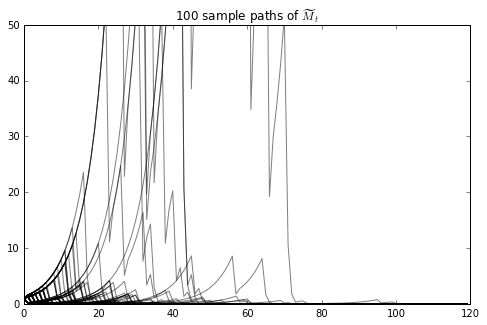

In [15]:
ylim = (0, 50)
fig, ax = plt.subplots(figsize=(8,5))
for i in range(num_reps):
    ax.plot(res.M_tilde[i], color='k', alpha=0.5)
    ax.set_xlim(0, ts_length)
    ax.set_ylim(*ylim)
ax.set_title(r'{0} sample paths of $\widetilde M_t$'.format(num_reps))
plt.show()

We revisit the peculiar sample path property at the end of this notebook.

## Stochastic discount factor and exponentially changing asset payouts

Define   a matrix ${\sf S}$ whose $(x, y)$th element is ${\sf S}(x,y) = \exp(G_S(x,y))$, where $G_S(x,y)$ is a stochastic discount rate
for moving from state $x$ at time $t$ to state $y$ at time $t+1$.

A stochastic discount factor process $\{S_t\}_{t=0}^\infty$ is governed by the **multiplicative functional**:

$$
{\frac {S_{t+1}}{S_t}} = \exp[ G_S(X_t, X_{t+1} ) ] = {\sf S}(X_t, X_{t+1}).
$$

Define   a matrix ${\sf D}$ whose $(x,y)$th element is ${\sf D}(x,y) = \exp(G_d(x,y))$.

A non-negative payout or dividend  process $\{d_t\}_{t=0}^\infty$ is governed by the **multiplicative functional**:

$$
{\frac {d_{t+1}}{d_t}} = \exp\left[ G_d(X_t,X_{t+1}) \right] = {\sf D}(X_t, X_{t+1}).
$$


Let $p_t$ be the price at the beginning of period $t$ of a claim to the stochastically growing or shrinking stream of payouts
$\{d_{t+j}\}_{j=0}^\infty$.

It satisfies

$$
p_t = E\left[\frac{S_{t+1}}{S_t} (d_t + p_{t+1}) \Bigm| {\mathfrak F}_t\right] ,
$$

or

$$
\frac{p_t}{d_t} =
E\left[\frac{S_{t+1}}{S_t}
       \left(1 + \frac{d_{t+1}}{d_t} \frac{p_{t+1}}{d_{t+1}}\right)
       \Bigm| {\mathfrak F}_t\right] ,
$$

where the time $t$ information set ${\mathfrak F}_t$ includes $X_t, S_t, d_t$.

Guessing that the price-dividend ratio $\frac{p_t}{d_t}$ is a function of the Markov state $X_t$ only, and letting
it equal $v(x)$ when $X_t = x$, write the preceding equation as

$$ v(x) =   \sum_{x \in S} P(x,y) \left[  {\sf S}(x,y) \mathbf{1}  +  {\sf S}(x,y) {\sf D}(x,y)  v(y)               \right] $$

or

$$
v = c + \widetilde{P} v ,
$$

where $c = \widehat{P} \mathbf{1}$ is by construction a nonnegative vector and we have defined
the nonnegative matrices $\widetilde{P} \in \mathbb{R}^{n \times n}$ and
$\widehat{P} \in \mathbb{R}^{n \times n}$ by

$$
\begin{aligned}
\widetilde{P}(x,y) &= P(x,y) {\sf S}(x,y) {\sf D}(x,y), \\
\widehat{P}(x,y) &= P(x,y) {\sf S}(x,y).
\end{aligned}
$$

The equation $v = \widetilde{P} v + c$  has a nonnegative solution
for any nonnegative vector $c$ if and only if
all the  eigenvalues of $\widetilde{P}$ are smaller than $1$ in modulus.

A sufficient condition for existence of a nonnegative solution is that all the column sums, or all the row sums, of $\widetilde{P}$ are less than one, which holds when $G_S + G_d \ll 0$. This condition describes a sense in which discounting counteracts growth in dividends.

Given a solution $v$, the price-dividend ratio is a stationary process that is a fixed function of the Markov state:

$$
\frac{p_t}{d_t} = v(x) \text{ when $X_t = x$}.
$$

Meanwhile, both the asset price process and the dividend process are multiplicative functionals that experience either multiplicative growth or decay.

### Implementation

The `AssetPricingMultFiniteMarkov` class
implements the asset pricing model with the specification of the stochastic discount factor process described above.


Below is an example of how to use the class. 

Please note that the stochastic discount rate matrix $G_S$ and the payout growth rate matrix $G_d$ are specified independently.

In the **Lucas asset pricing model** to be described below, the matrix $G_S$ is a function
of the payoff growth rate matrix $G_d$ and another parameter $\gamma$ that is a coefficient of relative risk aversion in the utility function of a representative consumer,
as well as the discount rate $\delta$.

In [16]:
# Transition probability matrix
P = [[0.4, 0.6],
     [0.2, 0.8]]

# Instance of MarkovChain from quantecon.markov
mc = MarkovChain(P)

In [17]:
# Stochastic discount rate matrix
G_S = [[-0.02, -0.03],
       [-0.01, -0.04]]

# Dividend growth rate matrix
G_d = [[0.01, 0.02],
       [0.005, 0.02]]

# AssetPricingMultFiniteMarkov instance
ap = AssetPricingMultFiniteMarkov(mc, G_S, G_d)

(1) Display the $\widetilde M$ matrices for $S_t$ and $d_t$.

In [18]:
ap.mf_S.M_tilde_matrix

array([[ 1.01196282,  0.99202479],
       [ 1.03230156,  0.99192461]])

In [19]:
ap.mf_d.M_tilde_matrix

array([[ 0.99325326,  1.00449783],
       [ 0.98705753,  1.00323562]])

(2) Plot sample paths of $S_t$ and $d_t$.

In [20]:
ts_length = 250
res = ap.simulate(ts_length)

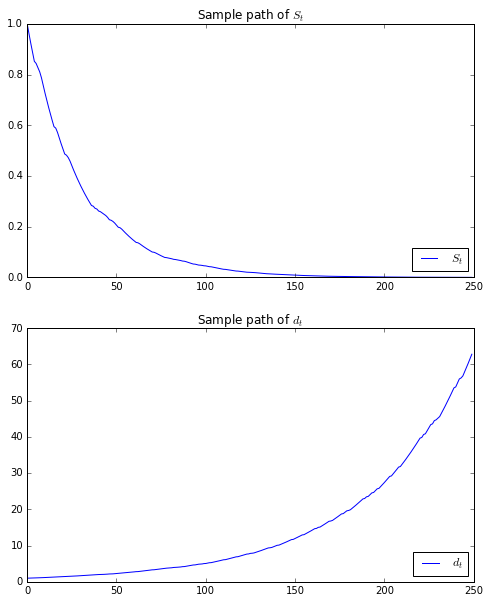

In [21]:
paths = [res.S, res.d]
labels = [r'$S_t$', r'$d_t$']
titles = ['Sample path of ' + label for label in labels]
loc = 4

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend(loc=loc)
plt.show()

(2) Print $v$.

In [22]:
print("price-dividend ratio in different Markov states = {0}".format(ap.v))

price-dividend ratio in different Markov states = [ 64.56797079  64.00927039]


(3) Plot sample paths of $p_t$ and $d_t$.

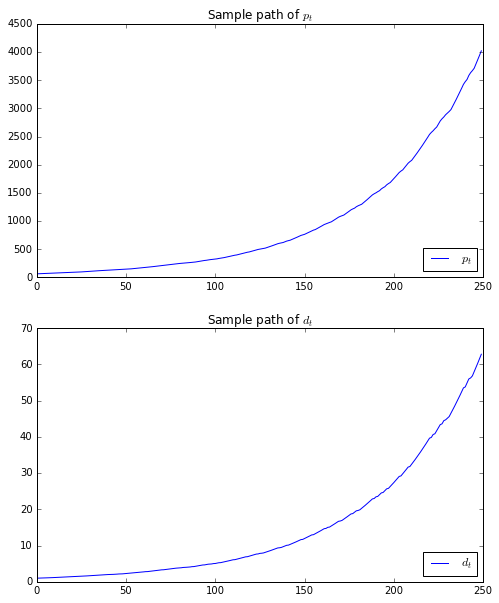

In [23]:
paths = [res.p, res.d]
labels = [r'$p_t$', r'$d_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend(loc=loc)
plt.show()

(5) Experiment with a different $G_S$ matrix.

In [24]:
# Change G_s[0, 1] from -0.03 to -1
G_S_2 = [[-0.02, -1],
         [-0.01, -0.04]]

ap_2 = AssetPricingMultFiniteMarkov(mc, G_S_2, G_d)

In [25]:
ap_2.v

array([ 4.09046945,  8.24984429])

In [26]:
res_2 = ap_2.simulate(ts_length)

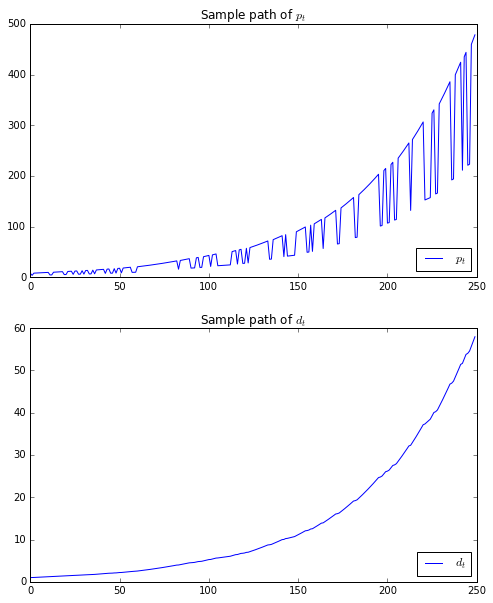

In [27]:
paths = [res_2.p, res_2.d]
labels = [r'$p_t$', r'$d_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend(loc=loc)
plt.show()

## Lucas asset pricing model with growth

As an example of our model of a **stochastic discount factor** and **payout process**, we'll adapt a version of the famous Lucas (1978) asset pricing model to have an exponentially growing aggregate consumption endowment.
We'll use CRRA utility
$u(c) = c^{1-\gamma}/(1-\gamma)$,
a common specification in applications of the Lucas model.

So now we let $d_t = C_t$, aggregate consumption, and we let 

$$\frac{S_{t+1}}{S_t} = \exp(-\delta) \left(\frac{C_{t+1}}{C_t} \right)^{-\gamma} ,$$

where $\delta > 0$ is a rate of time preference and $\gamma > 0$ is a coefficient of relative risk aversion. 

To obtain this special case of our model, we set

$$ {\sf S}(x, y) = \exp(-\delta) {\sf D}(x, y)^{-\gamma}, $$

where we now interpret  ${\sf D}(x, y)$ as the multiplicative rate of growth of the level of aggregate consumption between $t$ and $t+1$ when $X_t = x$ and $X_{t+1} = y$.  

### Term structure of interest rates
 
When the Markov state $X_t = x$ at time  $t$, the price of a risk-free zero-coupon bond paying one unit of consumption at time $t+j$
is

$$ p_{j,t} = E \left[ \frac{S_{t+j}}{S_t} \Bigm| X_t = x  \right]. $$

Let the matrix $\widehat{P}$ be given by $\widehat{P}(x, y) = P(x, y) {\sf S}(x, y)$
and apply the above **forecasting formula** to deduce

$$
 p_{j,t} = \left( \sum_{y \in S} \widehat P^j(x, y) \right).
$$

The **yield** $R_{jt}$ on a $j$ period risk-free bond satisfies

$$ p_{jt} = \exp(-j R_{jt}) $$

or

$$ R_{jt} = -\frac{\log(p_{jt})}{j}. $$

For a given $t$, 

$$ \begin{bmatrix} R_{1t} & R_{2t} & \cdots & R_{Jt} \end{bmatrix} $$

is the **term structure of interest rates** on risk-free zero-coupon bonds.

### Simulating the Lucas asset pricing model

Write $y$ for the process of quarterly per capita consumption growth with mean $\mu_C$.
In the following example,
we assume that $y - \mu_C$ follows a discretized version of an AR(1) process
(while independent of the Markov state),
where the discrete approximation is derived by the routine
[`tauchen`](http://quant-econ.net/py/finite_markov.html#exercise-3)
from `quantecon.markov`.

In [28]:
mu_C = .005  # mean of quarterly per capita consumption growth
sigma_C = .005  # standard deviation of quarterly per capita consumption growth
rho = .25  # persistence of per capita quarterly consumption growth

# standard deviation of the underlying noise distribution
sigma = sigma_C * np.sqrt(1 - rho**2)

m = 2  # number of standard deviations you would like the gridded vector y to cover
n = 5  # number of points in the discretization

y, P = tauchen(rho, sigma, m, n)
mc = MarkovChain(P)

y += mu_C  # consumption growth vector

# Consumption growth matrix
G_C = np.empty((n, n))
G_C[:] = y

# Discount rate
delta = .01

# Coefficient of relative risk aversion
gamma = 20

Create a `LucasTreeFiniteMarkov` instance:

In [29]:
lt = LucasTreeFiniteMarkov(mc, G_C, gamma, delta)

In [30]:
# Consumption growth rates
lt.G_C[0]

array([-0.005,  0.   ,  0.005,  0.01 ,  0.015])

In [31]:
# Stochastic discount rates
lt.G_S[0]

array([ 0.09, -0.01, -0.11, -0.21, -0.31])

Simulate the model:

In [32]:
ts_length = 250
res = lt.simulate(ts_length)

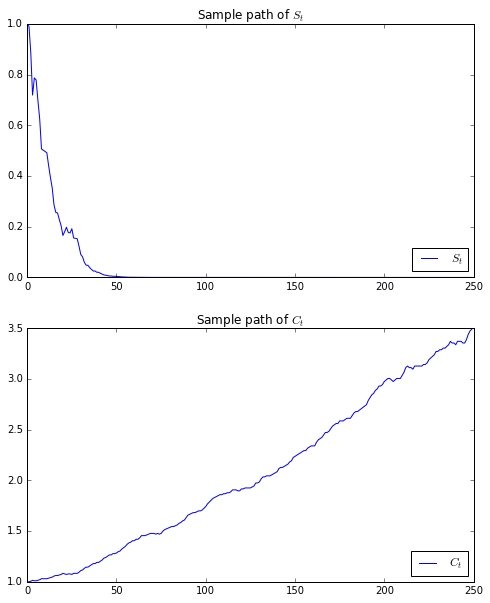

In [33]:
paths = [res.S, res.d]
labels = [r'$S_t$', r'$C_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend(loc=loc)
plt.show()

In [34]:
print("price-dividend ratio in different states = ")
lt.v

price-dividend ratio in different states = 


array([ 10.26478246,   9.97239545,   9.68315692,   9.40092066,   9.1290175 ])

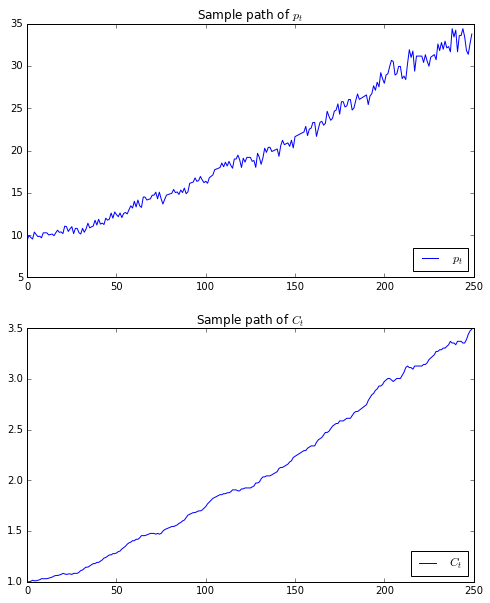

In [35]:
paths = [res.p, res.d]
labels = [r'$p_t$', r'$C_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend(loc=loc)
plt.show()

### Plotting the term structure of interest rates

In [36]:
G_S = lt.G_S

In [37]:
# SDF process as a MultiplicativeFunctional
mf = MultFunctionalFiniteMarkov(mc, G_S)

In [38]:
P_hat = mf.P_tilde

In [39]:
J = 20

# Sequence of price vectors
p = np.empty((J, n))
p[0] = P_hat.dot(np.ones(n))
for j in range(J-1):
    p[j+1] = P_hat.dot(p[j])

# Term structure
R = -np.log(p)
R /= np.arange(1, J+1)[:, np.newaxis]

In [40]:
R

array([[ 0.05732179,  0.08103259,  0.10515373,  0.12937031,  0.15337385],
       [ 0.07424111,  0.08891904,  0.1038699 ,  0.11889703,  0.13380842],
       [ 0.08254966,  0.09278489,  0.10321402,  0.11369969,  0.12410787],
       [ 0.08718206,  0.09493934,  0.10284426,  0.11079268,  0.11868298],
       [ 0.09005315,  0.09627448,  0.10261435,  0.10898924,  0.11531763],
       [ 0.09198551,  0.09717306,  0.10245947,  0.1077751 ,  0.11305199],
       [ 0.09336954,  0.09781664,  0.10234851,  0.10690543,  0.11142914],
       [ 0.09440835,  0.09829969,  0.10226521,  0.10625266,  0.11021105],
       [ 0.09521648,  0.09867548,  0.10220042,  0.10574484,  0.10926344],
       [ 0.09586302,  0.09897613,  0.10214858,  0.10533857,  0.10850531],
       [ 0.09639201,  0.09922212,  0.10210616,  0.10500615,  0.10788501],
       [ 0.09683284,  0.09942711,  0.10207081,  0.10472914,  0.1073681 ],
       [ 0.09720586,  0.09960056,  0.10204091,  0.10449474,  0.1069307 ],
       [ 0.09752558,  0.09974923,  0.1

The term structure of interest rates `R` is a sequence (of length `J`)
of vectors (of length `n` each).
Instead of plotting the whole `R`,
we plot the sequences for the "low", "middle", and "high" states.

Here we define those states as follows.
The vector $(p_{jt}|X_t = x)_{x \in S}$, if appropriately rescaled,
converges as $j \to \infty$
to an eigenvector of $\widehat P$ that corresponds to the dominant eigenvalue,
which equals `mf.e` times some constant.
Thus call the states that correspond to the smallest, largest, and middle values of `mf.e`
the high, low, and middle states.

In [41]:
mf.e

array([ 0.47535815,  0.46078769,  0.44639887,  0.43238352,  0.41890556])

In [42]:
hi = np.argsort(mf.e)[0]
lo = np.argsort(mf.e)[-1]
mid = np.argsort(mf.e)[mf.n//2]

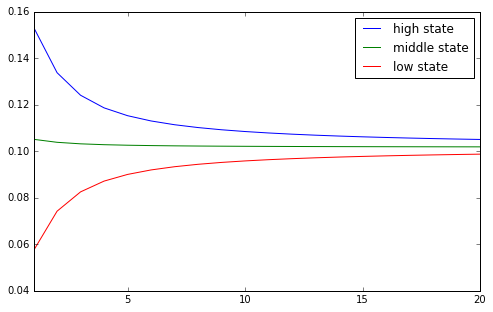

In [43]:
states = [hi, mid, lo]
labels = [s + ' state' for s in ['high', 'middle', 'low']]

fig, ax = plt.subplots(figsize=(8,5))
for i, label in zip(states, labels):
    ax.plot(np.arange(1, J+1), R[:, i], label=label)
ax.set_xlim((1, J))
ax.legend()
plt.show()

### Another class of examples

Let the elements of ${\sf D}$ (i.e., the multiplicative growth rates of the dividend or consumption process) be, for example, 
$$ {\sf D} = \begin{bmatrix} .95 & .975 &  1 \cr
      .975 &  1 & 1.025 \cr
       1 & 1.025 & 1.05 \end{bmatrix}.$$

Here the realized growth rate depends on both $X_t$ and $X_{t+1}$ -- i.e., the value of the state last period (i) and this period (j).  

Here we  have imposed symmetry to save parameters, but of course there is no reason to do that. 


We can combine this specification with various specifications of $P$ matrices e.g., an "i.i.d." state evolution process would be represented with  $P$ in which all rows are identical.  Even that simple specification
can some interesting outcomes with the above ${\sf D}$.  



We'll try this little  $3 \times 3$ example with a **Lucas model** below.

But first a word of caution.  

We have to choose values for the consumption growth rate matrix $G_C$ and
the transition matrix $P$ so that pertinent  eigenvalues are smaller than one in modulus.

This check is implemented in the code.

In [44]:
# Growth rate matrix
G_C = np.log([[.95  , .975, 1],
              [.975, 1 , 1.025],
              [1, 1.025, 1.05]])

# MarkovChain instance
P = [[0.1, 0.6, 0.3],
     [0.1, 0.5, 0.4],
     [0.1, 0.6, 0.3]]
mc = MarkovChain(P)

In [45]:
# Discount rate
delta = .01

# Coefficient of relative risk aversion
gamma = 20

In [46]:
lt = LucasTreeFiniteMarkov(mc, G_C, gamma, delta)

In [47]:
# Price-dividend ratios
lt.v

array([ 23.76708912,  13.79996014,   9.12713926])

In [48]:
ts_length = 250
res = lt.simulate(ts_length)

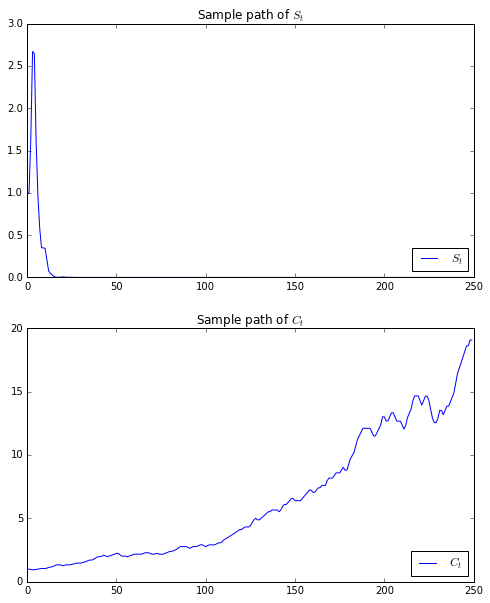

In [49]:
paths = [res.S, res.d]
labels = [r'$S_t$', r'$C_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend(loc=loc)
plt.show()

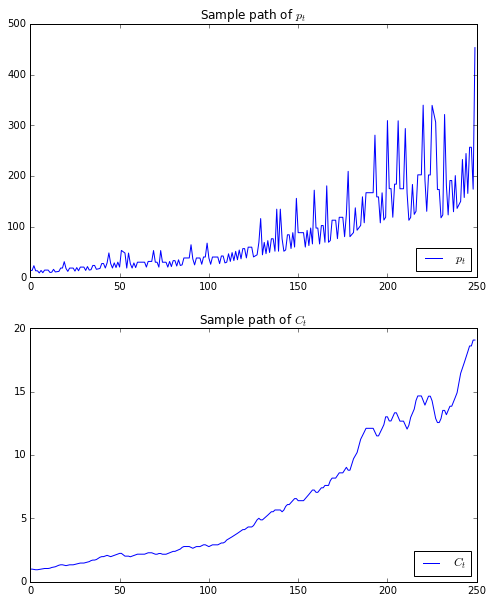

In [50]:
paths = [res.p, res.d]
labels = [r'$p_t$', r'$C_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend(loc=loc)
plt.show()

### The peculiar sample path property revisited

Consider again the **multiplicative martingale** that associated with the $5$ state Lucas model  studied earlier.

Remember that by construction, this is a **likelihood ratio process**.

Here we'll simulate a number of paths and build up histograms of $\widetilde M_t$ at various values of $t$.

These histograms should help us understand what is going on to generate the **peculiar property** mentioned above.

As $t \rightarrow +\infty$, notice that

  * more and more probability mass piles up near zero, $\ldots$ but
  
  * a longer and longer  thin right tail emerges. 

In [51]:
mf.P

array([[ 0.15084979,  0.34915021,  0.34915021,  0.13141624,  0.01943355],
       [ 0.0983528 ,  0.29977391,  0.38258428,  0.18393844,  0.03535057],
       [ 0.06066763,  0.24212068,  0.39442338,  0.24212068,  0.06066763],
       [ 0.03535057,  0.18393844,  0.38258428,  0.29977391,  0.0983528 ],
       [ 0.01943355,  0.13141624,  0.34915021,  0.34915021,  0.15084979]])

In [52]:
T = 200
num_reps = 10**5
res = mf.simulate(T+1, num_reps=num_reps)

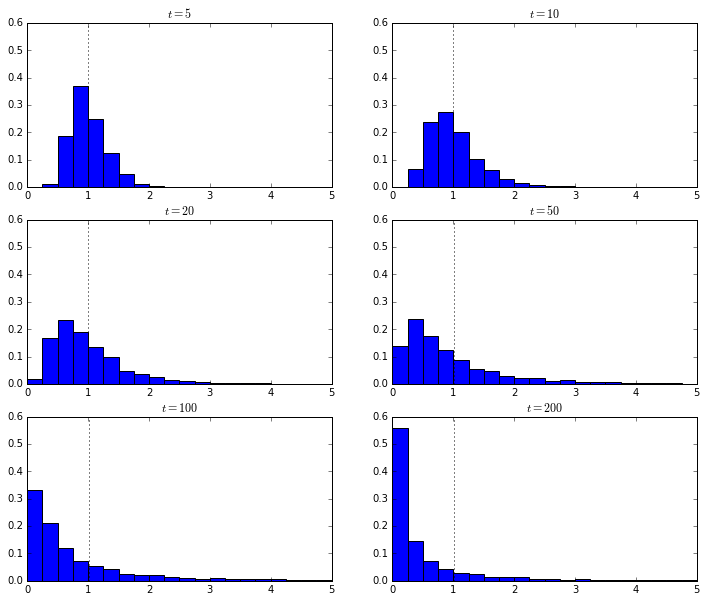

In [53]:
bins = np.linspace(0, 5, num=21)
bins_mid = (bins[:-1] + bins[1:]) / 2

nums_row_col = (3, 2)
xlim = (bins[0], bins[-1])
ylim = (0, 0.6)
width = (bins[0] + bins[-1]) / (len(bins)-1)

ts = [5, 10, 20, 50, 100, 200]
fig, axes = plt.subplots(*nums_row_col, figsize=(12,10))
for i, ax_idx in enumerate(itertools.product(*(range(n) for n in nums_row_col))):
    mean = res.M_tilde[:, ts[i]].mean()
    hist, _ = np.histogram(res.M_tilde[:, ts[i]], bins=bins)
    axes[ax_idx].bar(bins_mid, hist/num_reps, width, align='center')
    axes[ax_idx].vlines(mean, ax.get_ylim()[0], ax.get_ylim()[1], "k", ":")
    axes[ax_idx].set_xlim(*xlim)
    axes[ax_idx].set_ylim(*ylim)
    axes[ax_idx].set_title(r'$t = {}$'.format(ts[i]))
plt.show()

Observe that the sample mean in each panel, denoted by the dotted line, is very close to $1$.

## References

* Lars Peter Hansen and Thomas J. Sargent (2017), *Risk, Uncertainty, and Value*,  Princeton University Press, forthcoming.
  
* Lars Peter Hansen and Jose A. Scheinkman (2009), 
  "Long-Term Risk: An Operator Approach," Econometrica, 77(1), 177-234.

* Robert E. Lucas, Jr. (1978),
  "Asset Prices in an Exchange Economy," Econometrica 46, 1429-1445.